<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_15_16_Modelos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

### **1. Carga Inicial de Librerías**

In [523]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### **2. Carga y Análisis inicial de datos**

In [524]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [525]:
df_clase.shape

(31944, 31)

In [526]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [527]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [528]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [529]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [530]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [531]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

0    29920
1     2024
Name: FLG_DEFAULT_12M, dtype: int64

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


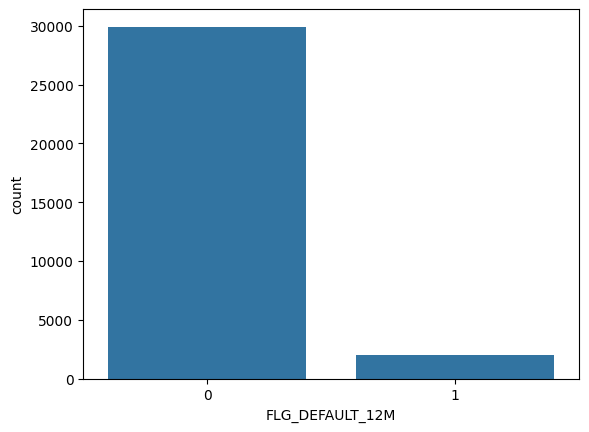

In [532]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

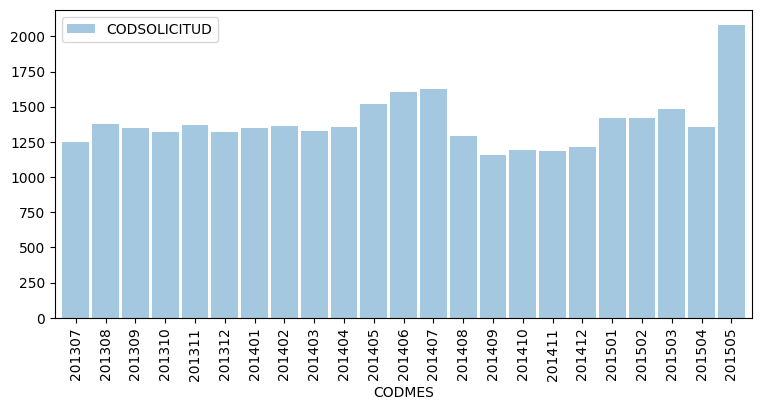

In [533]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

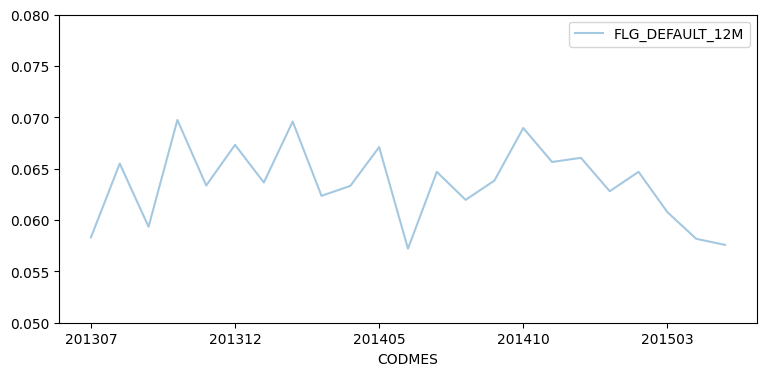

In [534]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

# **3. Feature Engineering**

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [535]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [536]:
pip install feature_engine

### Partición Train y test (considerando estratificación de la Y)

In [537]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [538]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06337209302325582

In [539]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.0633347245409015

In [540]:
# Revisión de la proporción de nulos por variable
X_train.isnull().mean().where(X_train.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
DEUDA                           NaN
PLAZO_CREDITO                   NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
ATRASO_MAXIMO_ULT_6M            NaN
ATRASO_MAXIMO_ULT_12M      0.000045
ATRASO_MAXIMO_ULT_24M      0.000179
MESES_AHORROS_ULT_6M       0.020081
MEDIANA_AHORROS_ULT_6M     0.000089
DEUDA_TOTAL_SISTEMA        0.100134
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
NUMERO_DE_PAGOS_PDH             NaN
MONTO_TC_SISTEMA                NaN
INGRESO_CLIENTE            0.024240
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.030367
CUOTA                      0.020081
LINEA_DE_TC                0.020081
MONTO_TC_MEMBRESIA         0

### Variable numéricas

In [541]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                          NaN
PLAZO_CREDITO                  NaN
ATRASO_MAXIMO_ULT_6M           NaN
ATRASO_MAXIMO_ULT_12M     0.000045
ATRASO_MAXIMO_ULT_24M     0.000179
MESES_AHORROS_ULT_6M      0.020081
MEDIANA_AHORROS_ULT_6M    0.000089
DEUDA_TOTAL_SISTEMA       0.100134
NUMERO_DE_PAGOS_PDH            NaN
MONTO_TC_SISTEMA               NaN
INGRESO_CLIENTE           0.024240
EDAD_T                    0.030367
CUOTA                     0.020081
LINEA_DE_TC               0.020081
MONTO_TC_MEMBRESIA        0.020081
dtype: float64

### Variables categóricas

In [542]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
FLG_TC_VISA                     NaN
FLG_TC_MC                       NaN
dtype: float64

### Generamos un pipeline para tratamiento de Nulos

In [543]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

In [544]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [545]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [546]:
pipe_2.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [547]:
pipe_2.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [548]:
pipe_2.named_steps['mode_imputer'].imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [549]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [550]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [551]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [552]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [553]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [554]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [555]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [556]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


#### Generamos un pipeline para tratamiento de valores raros

In [557]:
from feature_engine.encoding import RareLabelEncoder

In [558]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
    ]
)

In [559]:
pipe_3.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL'])),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.01,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [560]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [561]:
# Comprobando el funcionamiento del pipeline
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [562]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [563]:
X_train_t.PROFESION.value_counts()

TECNICO                    7888
Rare                       4230
ADMINISTRADOR              3955
INGENIERO                  2202
CONTADOR                   1151
OBRERO / OPERADOR           583
ECONOMISTA                  393
ABOGADO                     376
MECANICO                    362
INGENIERO DE SISTEMAS       276
INGENIERO INDUSTRIAL        248
TEC MECANICO AUTOMOTRIZ     238
ENFERMERO                   229
TEC MECANICO INDUSTRIAL     229
Name: PROFESION, dtype: int64

In [564]:
X_train_t.SEGMENTOCLIENTE.value_counts()

CLIENTES ORO                15423
CLIENTES PLATINUM SEGM 2     6646
Rare                          291
Name: SEGMENTOCLIENTE, dtype: int64

### IMPORTANTE: Hasta aqui tenemos un pipeline para imputar nuestras variables numéricas y categóricas en caso de missing, además de generar un grupo de casos "Raros" para las variables categóricas donde encontramos problemas.

## **4. Feature Selection**
Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [565]:
tot_train_t=pd.concat([X_train_t[cat_cols], y_train], axis=1)
tot_train_t.head()

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,0,CLIENTES PLATINUM SEGM 2,1,0,0,0.0,1,ADMINISTRADOR,CALLAO,SOL,0.0,0.0,0
27337,1,CLIENTES PLATINUM SEGM 2,0,0,1,0.0,0,CONTADOR,SAN_MARTIN,SOL,1.0,1.0,0
573,0,CLIENTES ORO,0,0,0,0.0,1,Rare,LIMA_NORTE,SEP,1.0,1.0,0
31740,0,CLIENTES ORO,0,0,0,0.0,1,TECNICO,AREQUIPA,CAS,1.0,1.0,0
25079,0,CLIENTES PLATINUM SEGM 2,1,0,1,1.0,1,INGENIERO,LIMA_ESTE,CAS,0.0,0.0,0


In [566]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [567]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Generemos un reporte con todas los IVs

In [568]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

### 4.1 Variables Categóricas

In [569]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

,Feature,IV
5,CLASIF_SISTEMA_ULT_12M,0.139344
6,FLG_PDH,0.107184
7,PROFESION,0.095820
1,SEGMENTOCLIENTE,0.067551
8,ZONA_DEL_DESEMBOLSO,0.060199
9,ESTADO_CIVIL,0.055085
0,FLG_GARANTIA,0.042176
4,HIPOTECARIO_RELACIONADA,0.021914
10,FLG_TC_VISA,0.010919
11,FLG_TC_MC,0.009376


### En este punto, quedémonos solo con las variables cuyo IV es mayor al 5%

In [570]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL']

### Codificación de variables categóricas:

In [468]:
from feature_engine.encoding import WoEEncoder

In [571]:
encoder_2 = WoEEncoder(variables=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'],
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols_2], y_train)

WoEEncoder(fill_value=0,
           variables=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                      'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL'])

In [383]:
# encoder_2.encoder_dict_
# encoder_2.variables_

In [572]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols_2])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols_2])

In [573]:
X_train_woe_enc.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542


### 4.2 Variables numéricas

In [574]:
X_train_t.select_dtypes(include=['number']).columns

Index(['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T',
       'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
      dtype='object')

In [575]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

#### En este punto discretizo para luego encontrar el IV de las variables

In [576]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [577]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['DEUDA', 'PLAZO_CREDITO',
                                     'ATRASO_MAXIMO_ULT_6M',
                                     'ATRASO_MAXIMO_ULT_12M',
                                     'ATRASO_MAXIMO_ULT_24M',
                                     'MESES_AHORROS_ULT_6M',
                                     'MEDIANA_AHORROS_ULT_6M',
                                     'DEUDA_TOTAL_SISTEMA',
                                     'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA',
                                     'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                                     'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])

In [393]:
#disc1.binner_dict_

In [578]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [579]:
X_train_t_numdisc.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,"(14431.573, inf]","(48.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(12129.063, 21550.644]","(-inf, 55.972]","(16.0, inf]","(-inf, 478.565]","(6636.091, inf]","(33.0, 35.0]","(19.32, 59.266]","(11900.0, 15110.0]","(157.0, 170.0]"
27337,"(2694.258, 3768.298]","(36.0, 48.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 2.0]","(6060.229, 8444.373]","(51966.604, inf]","(-inf, 1.0]","(478.565, 1384.854]","(3224.442, 4319.414]","(26.0, 28.0]","(980.382, 1861.046]","(15110.0, 18847.6]","(97.0, 128.0]"
573,"(3768.298, 5091.71]","(36.0, 48.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(4362.921, 6060.229]","(14309.662, 24508.31]","(16.0, inf]","(-inf, 478.565]","(2271.177, 2614.283]","(40.0, 44.0]","(587.911, 980.382]","(5300.0, 7447.0]","(74.0, 80.0]"
31740,"(808.278, 1347.129]","(36.0, 48.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(6060.229, 8444.373]","(14309.662, 24508.31]","(16.0, inf]","(-inf, 478.565]","(2614.283, 3224.442]","(44.0, 51.0]","(587.911, 980.382]","(18847.6, 23850.0]","(74.0, 80.0]"
25079,"(1979.245, 2694.258]","(12.0, 24.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(3103.343, 4362.921]","(51966.604, inf]","(16.0, inf]","(15684.989, inf]","(6636.091, inf]","(44.0, 51.0]","(1861.046, inf]","(11900.0, 15110.0]","(170.0, inf]"


### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [580]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_DEFAULT_12M
1517,"(14431.573, inf]","(48.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(12129.063, 21550.644]","(-inf, 55.972]","(16.0, inf]","(-inf, 478.565]","(6636.091, inf]","(33.0, 35.0]","(19.32, 59.266]","(11900.0, 15110.0]","(157.0, 170.0]",0
27337,"(2694.258, 3768.298]","(36.0, 48.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 2.0]","(6060.229, 8444.373]","(51966.604, inf]","(-inf, 1.0]","(478.565, 1384.854]","(3224.442, 4319.414]","(26.0, 28.0]","(980.382, 1861.046]","(15110.0, 18847.6]","(97.0, 128.0]",0
573,"(3768.298, 5091.71]","(36.0, 48.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(4362.921, 6060.229]","(14309.662, 24508.31]","(16.0, inf]","(-inf, 478.565]","(2271.177, 2614.283]","(40.0, 44.0]","(587.911, 980.382]","(5300.0, 7447.0]","(74.0, 80.0]",0
31740,"(808.278, 1347.129]","(36.0, 48.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(6060.229, 8444.373]","(14309.662, 24508.31]","(16.0, inf]","(-inf, 478.565]","(2614.283, 3224.442]","(44.0, 51.0]","(587.911, 980.382]","(18847.6, 23850.0]","(74.0, 80.0]",0
25079,"(1979.245, 2694.258]","(12.0, 24.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(5.0, inf]","(3103.343, 4362.921]","(51966.604, inf]","(16.0, inf]","(15684.989, inf]","(6636.091, inf]","(44.0, 51.0]","(1861.046, inf]","(11900.0, 15110.0]","(170.0, inf]",0


In [581]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

,Feature,IV
6,MEDIANA_AHORROS_ULT_6M,0.358339
10,INGRESO_CLIENTE,0.337741
5,MESES_AHORROS_ULT_6M,0.201981
8,NUMERO_DE_PAGOS_PDH,0.183294
1,PLAZO_CREDITO,0.173877
13,LINEA_DE_TC,0.082388
11,EDAD_T,0.079741
14,MONTO_TC_MEMBRESIA,0.058139
0,DEUDA,0.046217
4,ATRASO_MAXIMO_ULT_24M,0.034082


### Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 5%

In [583]:
num_cols_2=['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
            'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

## Tratamiento de outliers y escalado de las variables numéricas

In [584]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5800.149362,5912.375849,8.791365,1614.985000,3768.298333,7869.050000,2.054835e+05
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,6.000000e+01
ATRASO_MAXIMO_ULT_6M,22360.0,0.274508,3.405186,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,22360.0,1.037478,38.114128,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,22360.0,2.151699,49.190130,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,22360.0,7189.387085,9092.414168,0.000000,1712.270417,4362.920626,9507.471667,8.185772e+05
DEUDA_TOTAL_SISTEMA,22360.0,22073.208282,56672.958615,0.000000,556.875000,5136.870000,18553.420000,1.079214e+06
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,2.400000e+01
MONTO_TC_SISTEMA,22360.0,5604.264393,14250.281961,0.000000,0.000000,478.565000,4188.745000,2.393316e+05


In [585]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper.fit(X_train_t)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
                      'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
                      'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M',
                      'DEUDA_TOTAL_SISTEMA', 'NUMERO_DE_PAGOS_PDH',
                      'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                      'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])

In [401]:
#capper.right_tail_caps_

In [586]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [587]:
#plot_boxplot_and_hist(X_train_t2, "var")
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5767.696927,5662.719977,8.791365,1614.985000,3768.298333,7869.050000,23574.760420
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,60.000000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000
MEDIANA_AHORROS_ULT_6M,22360.0,7146.544957,7272.373742,0.000000,1712.270417,4362.920626,9507.471667,24065.564330
DEUDA_TOTAL_SISTEMA,22360.0,20508.116018,43687.720951,0.000000,556.875000,5136.870000,18553.420000,280120.580200
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,24.000000
MONTO_TC_SISTEMA,22360.0,5286.382362,11951.112587,0.000000,0.000000,478.565000,4188.745000,72022.006800


### Ahora hagamos el escalado de variables de las variables numéricas

In [408]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [588]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [589]:
X_train_t_numoutscal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


In [590]:
X_train_t2=pd.concat([X_train_t[cat_cols], X_train_t_numoutscal], axis=1)
X_test_t2=pd.concat([X_test_t[cat_cols], X_test_t_numoutscal], axis=1)

In [591]:
from sklearn.compose import ColumnTransformer

In [592]:
# Actualicemos nuestro pipeline
pipe_5 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (
            "encoder_2",
            WoEEncoder(variables=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'],
                       fill_value=0)
        ),
        (   "capper",
            Winsorizer(variables=['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
            'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
            'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [593]:
pipe_5.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                                       'NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
                                       'EDAD_T', 'LINEA_DE_TC',
                                       'MONTO_TC_MEMBRESIA'])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['PLAZO_CREDITO',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'NUMERO_DE_PAGOS_PDH',
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False))])

In [594]:
X_train_t_p = pipe_5.transform(X_train)
X_test_t_p = pipe_5.transform(X_test)

### 4.3 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [595]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [596]:
X_train_t3=pd.concat([X_train_woe_enc, X_train_t2[num_cols_2]], axis=1)
X_train_t3.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,PLAZO_CREDITO,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,NUMERO_DE_PAGOS_PDH,INGRESO_CLIENTE,EDAD_T,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.5,0.0,1.446314,0.000000,2.868168,-0.076923,0.233097,0.663636
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467,0.0,-6.0,0.400565,-1.352941,1.000018,-0.538462,0.465725,0.027273
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,0.0,0.0,0.002082,0.000000,0.091014,0.461538,-0.265526,-0.190909
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,0.0,0.0,0.451028,0.000000,0.264821,0.769231,0.867921,-0.172727
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542,-1.0,0.0,-0.126619,0.000000,5.639764,1.000000,0.343121,2.754545


In [597]:
corr_features = correlation(X_train_t3, 0.8)
len(set(corr_features))

0

In [325]:
# Si hubiesen variables correlacionadas deberían ser extraidas, de la siguiente forma
# X_train.drop(labels=corr_features, axis=1, inplace=True)
# X_test.drop(labels=corr_features, axis=1, inplace=True)
# X_train.shape, X_test.shape
# Alternativamente, podemos hacer lo siguiente
#from feature_engine.selection import DropCorrelatedFeatures
#sel = DropCorrelatedFeatures(
#    threshold=0.8,
#    method='pearson',
#    missing_values='ignore'
#)
#sel.fit(X_train)
#X_train = sel.transform(X_train)
#X_test = sel.transform(X_test)
#X_train.shape, X_test.shape


### Alternativamente usaremos las variables numéricas discretizadas y codificadas

In [598]:
encoder_4 = WoEEncoder(variables=num_cols_2,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc[num_cols_2], y_train)

WoEEncoder(fill_value=0,
           variables=['PLAZO_CREDITO', 'MESES_AHORROS_ULT_6M',
                      'MEDIANA_AHORROS_ULT_6M', 'NUMERO_DE_PAGOS_PDH',
                      'INGRESO_CLIENTE', 'EDAD_T', 'LINEA_DE_TC',
                      'MONTO_TC_MEMBRESIA'])

In [599]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc[num_cols_2])
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc[num_cols_2])

In [600]:
X_train_woe_enc2.head()

,PLAZO_CREDITO,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,NUMERO_DE_PAGOS_PDH,INGRESO_CLIENTE,EDAD_T,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,-0.103855,-0.380749,-1.192188,-0.392951,-1.749389,0.115789,0.088857,-0.005886
27337,0.373314,0.696012,-0.230653,0.622876,-0.525613,0.255996,-0.211847,-0.108941
573,0.373314,-0.380749,0.075099,-0.392951,-0.354998,-0.209728,0.078626,0.039955
31740,0.373314,-0.380749,-0.230653,-0.392951,-0.258734,-0.243696,-0.151363,0.039955
25079,-0.602574,-0.380749,0.195691,-0.392951,-1.749389,-0.243696,0.088857,-0.852756


In [604]:
X_train_t_numoutscal = X_train_t_numoutscal[num_cols_2]
X_test_t_numoutscal = X_test_t_numoutscal[num_cols_2]

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [601]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [607]:
logit = LogisticRegression()
logit.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)
pred_train_logit = logit.predict_proba(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1))
pred_test_logit = logit.predict_proba(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

Train set
Logistic regression roc-auc: 0.7694003156937281
Test set
Logistic regression roc-auc: 0.7590391626853836


In [608]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1),y_train)
pred_train_rf = rf.predict_proba(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1))
pred_test_rf = rf.predict_proba(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

Train set
Random Forests roc-auc: 0.9999999831514993
Test set
Random Forests roc-auc: 0.7547993325061538


In [609]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)
pred_train_gbc = gbc.predict_proba(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1))
pred_test_gbc = gbc.predict_proba(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.8578560397376608
Test set
Gradient Boosted Trees roc-auc: 0.7649064357953761


#### IMPORTANTE: Hasta aqui tenemos un modelo ganador por estabilidad entre train y test< entonces revisemos como podemos optimizar sus hiperparámetros para reducir este efecto

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

## **Random Forest**

#### Evaluemos que la sensibilidad de cada hiperparámetro

#### Nro de árboles




In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5],
#     min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'n_estimators': 200}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.999788,0.000051,0.655734,0.012707
1,{'n_estimators': 20},0.999997,0.000001,0.698329,0.012898
2,{'n_estimators': 50},1.000000,0.000000,0.738328,0.008452
3,{'n_estimators': 100},1.000000,0.000000,0.751445,0.010731
4,{'n_estimators': 200},1.000000,0.000000,0.759846,0.009795


Text(0.5, 0, 'n_estimators')

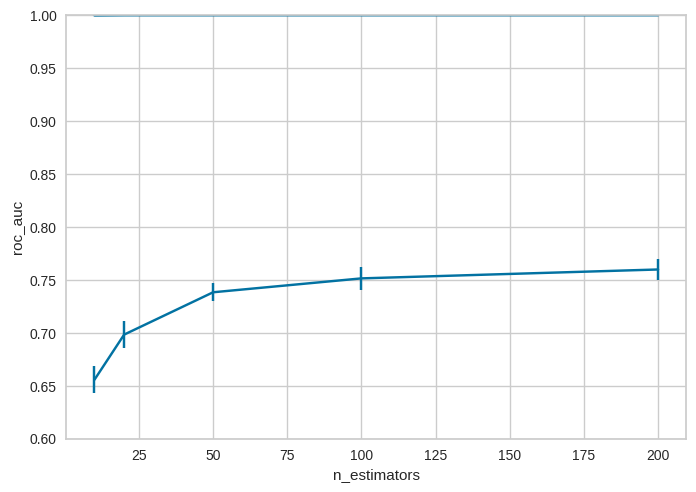

In [ ]:
# plot results
results.index = rf_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Profundidad

In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[10, 20, 50, 100, 200],
      max_depth=[1, 2, 3, 4, 5],
#     min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'max_depth': 5}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.727443,0.003388,0.719189,0.010202
1,{'max_depth': 2},0.753987,0.004259,0.742501,0.008362
2,{'max_depth': 3},0.771508,0.003236,0.751621,0.009641
3,{'max_depth': 4},0.793430,0.003179,0.759361,0.012375
4,{'max_depth': 5},0.819083,0.003752,0.762986,0.011496


Text(0.5, 0, 'max_depth')

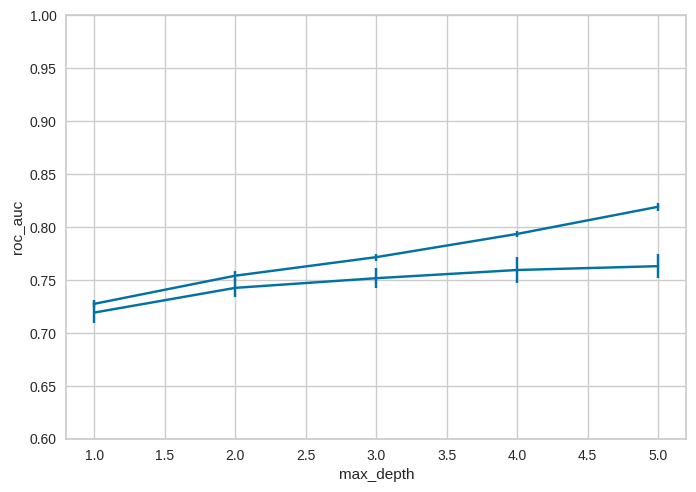

In [ ]:
# plot results
results.index = rf_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

#### Nro mínimo de observaciones para partir el nodo

In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5],
      min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'min_samples_split': 0.01}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.915347,0.001646,0.770458,0.011741
1,{'min_samples_split': 0.05},0.815544,0.001981,0.765697,0.012814
2,{'min_samples_split': 0.1},0.787893,0.001843,0.759799,0.012181
3,{'min_samples_split': 0.2},0.766536,0.003381,0.751215,0.012203
4,{'min_samples_split': 0.3},0.752518,0.002139,0.741264,0.012106
5,{'min_samples_split': 0.5},0.728411,0.003454,0.720608,0.012103


Text(0.5, 0, 'min_samples_split')

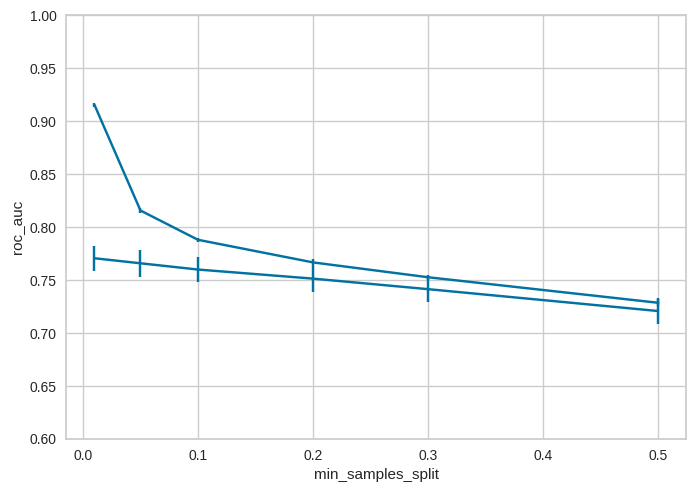

In [ ]:
# plot results
results.index = rf_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

## Veamos el GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
    max_depth=[1, 2, 3, 4, 5],
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc',return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
# Opciones de Cross Validation -> Esto se inserta en el hiperparámetro cv
# K-Fold Cross-Validation
#kf = KFold(n_splits=5, shuffle=True, random_state=4)
# Repeated K-Fold Cross-Validation
#rkf = RepeatedKFold(n_splits=5, n_repeats=10,random_state=4)
# Leave One Out Cross-Validation
#loo = LeaveOneOut()
# Leave P Out Cross-Validation
#lpo = LeavePOut(p=2)
# Stratified K Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

## Veamos el RandomSearch para encontrar la mejor combinación en el Random Forest

In [ ]:
# set up the model
rf = RandomForestClassifier(random_state=39)
# hyperparameter space
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )
# search
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.779123,0.003116,0.757003,0.010785
1,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.770368,0.003629,0.751703,0.009883
2,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.771139,0.003276,0.751247,0.009595
3,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.769394,0.003752,0.750998,0.010251
4,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.769212,0.003753,0.750748,0.010871
5,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.763738,0.003485,0.748110,0.011097
6,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.754874,0.003764,0.743797,0.009566
7,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.751505,0.002606,0.741255,0.011095
8,"{'max_depth': 2, 'min_samples_split': 0.159193...",0.751317,0.004493,0.740256,0.009332
9,"{'max_depth': 4, 'min_samples_split': 0.309778...",0.749721,0.002927,0.738589,0.012682


Text(0.5, 0, 'Hyperparameter space')

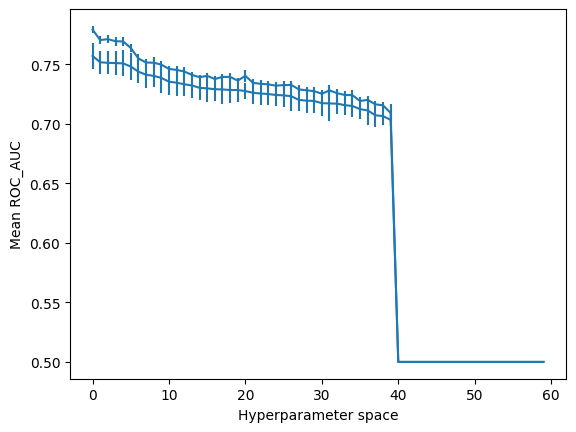

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

#### CONCLUSION RF: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [610]:
# Lo dejamos entrenado con los parámetros hallados
rf = RandomForestClassifier(max_depth= 4, min_samples_split=0.07685550174624711, n_estimators=155, random_state=39)
rf.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)
pred_train_rf = rf.predict_proba(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1))
pred_test_rf = rf.predict_proba(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]))

Train roc_auc:  0.7669192728685795
Test roc_auc:  0.7530392056287357


## **Gradient Boosting**


#### Evaluemos la sensibilidad de cada parámetro

#### Nro de Arboles

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
    #min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'n_estimators': 100}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.774677,0.004120,0.745423,0.015225
1,{'n_estimators': 20},0.791921,0.003764,0.756516,0.012008
2,{'n_estimators': 50},0.820391,0.002977,0.769820,0.010815
3,{'n_estimators': 100},0.842449,0.003142,0.773289,0.009267
4,{'n_estimators': 200},0.874234,0.002829,0.772843,0.010843


Text(0.5, 0, 'n_estimators')

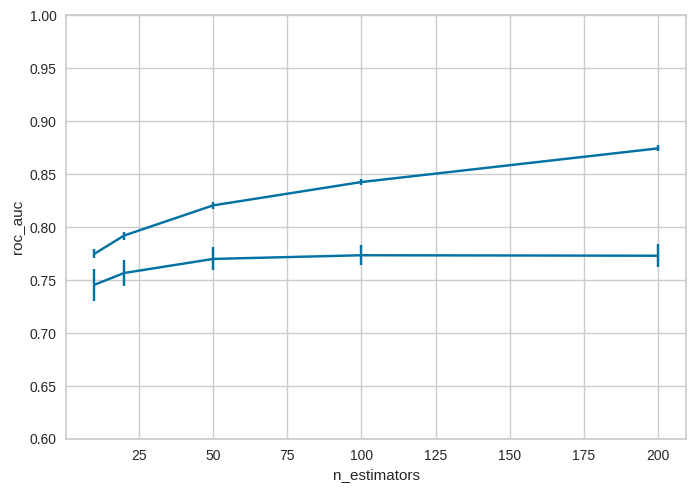

In [ ]:
# plot results
results.index = gbc_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Nro mínimo de observaciones para partir el nodo

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    #n_estimators=[10, 20, 50, 100, 200],
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'min_samples_split': 0.2}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.838403,0.003143,0.772867,0.009221
1,{'min_samples_split': 0.05},0.832462,0.002304,0.774314,0.010518
2,{'min_samples_split': 0.1},0.827856,0.004013,0.773807,0.010847
3,{'min_samples_split': 0.2},0.821954,0.003172,0.774755,0.010235
4,{'min_samples_split': 0.3},0.815436,0.002750,0.774071,0.010231
5,{'min_samples_split': 0.5},0.802875,0.002915,0.773472,0.011442


Text(0.5, 0, 'min_samples_split')

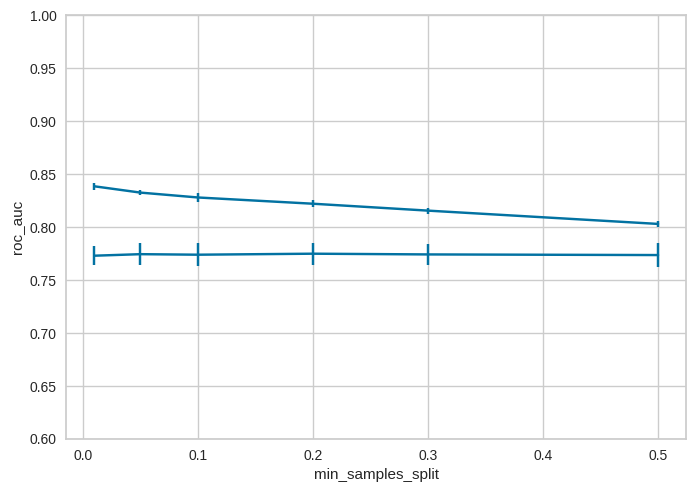

In [ ]:
# plot results
results.index = gbc_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

#### Profundidad

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    #n_estimators=[10, 20, 50, 100, 200],
    #min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'max_depth': 3}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.774353,0.003370,0.759858,0.012128
1,{'max_depth': 2},0.807370,0.003063,0.772805,0.010028
2,{'max_depth': 3},0.842449,0.003142,0.773289,0.009267
3,{'max_depth': 4},0.884068,0.002531,0.772912,0.010896
4,{'max_depth': 5},0.931129,0.003090,0.769108,0.010938


Text(0.5, 0, 'max_depth')

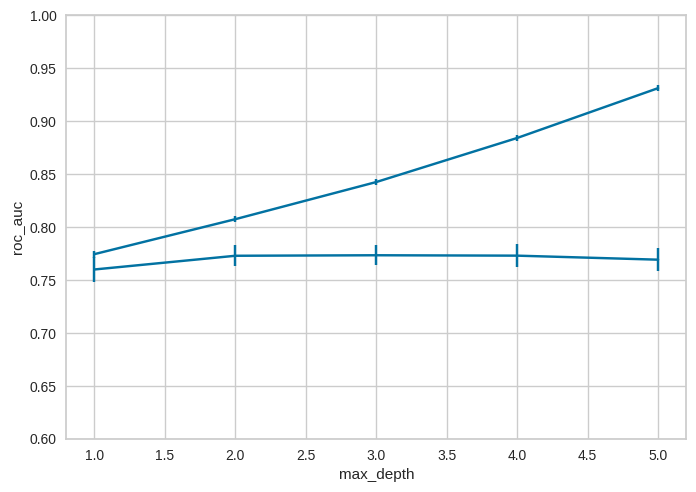

In [ ]:
# plot results
results.index = gbc_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

## Veamos al GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

## Veamos el RandomSearch para encontrar la mejor combinación en el Gradient Boosting

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc = reg_gbc.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search_gbc.best_params_

{'max_depth': 4, 'min_samples_split': 0.4674032789842478, 'n_estimators': 153}

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.823454,0.003703,0.776289,0.010276
1,"{'max_depth': 3, 'min_samples_split': 0.440773...",0.819169,0.003215,0.775780,0.010286
2,"{'max_depth': 3, 'min_samples_split': 0.441833...",0.817674,0.003094,0.775510,0.010095
3,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.838833,0.002830,0.775270,0.010148
4,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.828295,0.002650,0.775160,0.009345
5,"{'max_depth': 3, 'min_samples_split': 0.373340...",0.811361,0.002959,0.774784,0.010100
6,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.829545,0.002537,0.774738,0.010020
7,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.815429,0.002448,0.774659,0.010924
8,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.809350,0.003069,0.774577,0.010244
9,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.854054,0.001897,0.774559,0.011086


Text(0.5, 0, 'Hyperparameter space')

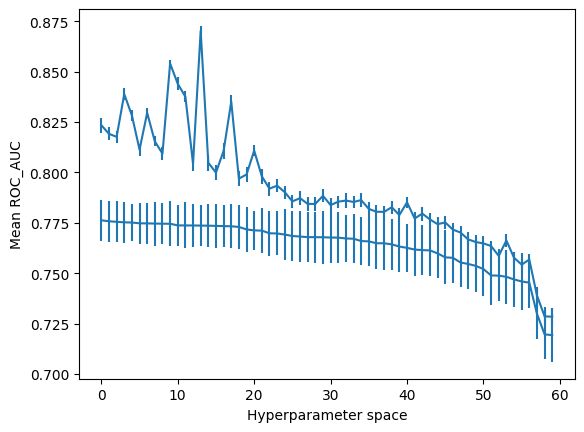

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### CONCLUSION GBC: Evaluemos como le va al modelo con los parámetros elegidos en train y test

In [611]:
# Lo dejamos entrenado con los parámetros hallados
gbc = GradientBoostingClassifier(max_depth= 4, min_samples_split=0.4674032789842478, n_estimators=153, random_state=0)
gbc.fit(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1), y_train)
pred_train_gbc = gbc.predict_proba(pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1))
pred_test_gbc = gbc.predict_proba(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]))

Train roc_auc:  0.7997703785227982
Test roc_auc:  0.7682408769693151


### Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?

In [612]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Logit Test roc_auc:  0.7590391626853836 Logit Test GINI:  0.5180783253707673
RF Test roc_auc:  0.7530392056287357 RF Test GINI:  0.5060784112574714
GBC Test roc_auc:  0.7682408769693151 GBC Test GINI:  0.5364817539386302


#### FINALMENTE: Si bien no hay una gran diferencia entre los 3 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de **Gradient Boosting**

### **6. Valoración del Modelo**
Empecemos a revisar con el modelo final algunas métricas de valoración del modelo

### **Accuracy**
Porcentaje de predicciones correctas

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
br_test=y_test.value_counts() / len(y_test)
br_test

0    0.936665
1    0.063335
Name: FLG_DEFAULT_12M, dtype: float64

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))))

Accuracy Baseline test:  0.9366652754590985
Accuracy GBC test: 0.9368739565943238


In [ ]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, GBC test: 0.504719547795492


## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
# Precision
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision GBC test:', precision_score(y_test,gbc.predict(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))))

Precision Baseline test:  0.0
Precision GBC test: 0.6


In [ ]:
# Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall GBC test:', recall_score(y_test,gbc.predict(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))))

Recall Baseline test:  0.0
Recall GBC test: 0.009884678747940691


In [ ]:
# F1-Score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base))
print('F-measure GBC test:', f1_score(y_test, gbc.predict(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1))))

F-measure Baseline test:  0.0
F-measure GBC test: 0.019448946515397077


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, gbc.predict(pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1)))

print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', fscore)
print('Support: ', support)

Precision:  [0.93722582 0.6       ]
Recall:  [0.99955442 0.00988468]
F1-score:  [0.9673872  0.01944895]
Support:  [8977  607]


In [613]:
X_train_woe_enc_tot=pd.concat([X_train_woe_enc,X_train_t_numoutscal],axis=1)
X_test_woe_enc_tot=pd.concat([X_test_woe_enc,X_test_t_numoutscal],axis=1)

In [614]:
X_train_woe_enc_tot.shape

(22360, 14)

In [615]:
X_test_woe_enc_tot.shape

(9584, 14)

## Matriz de Confusión

TN | FP

FN | TP

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[8977,    0],
       [ 607,    0]])

In [ ]:
confusion_matrix(y_test, gbc.predict(X_test_woe_enc_tot), labels=[0,1])

array([[8973,    4],
       [ 601,    6]])

## Identificamos un punto de corte óptimo que maximice el F1 Score

In [ ]:
from yellowbrick.classifier import (
    DiscriminationThreshold,
)

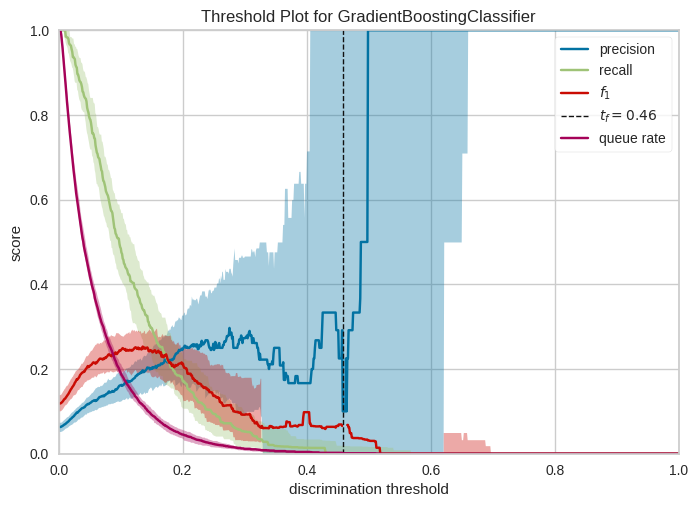

<Axes: title={'center': 'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
visualizer = DiscriminationThreshold(gbc, is_fitted=True, random_state=0, argmax='fscore')#fbeta=3
visualizer.fit(X_test_woe_enc_tot, y_test)
visualizer.score(X_test_woe_enc_tot, y_test)
visualizer.show()

### Adicionamos un cálculo de ROC

In [ ]:
from yellowbrick.classifier import ROCAUC

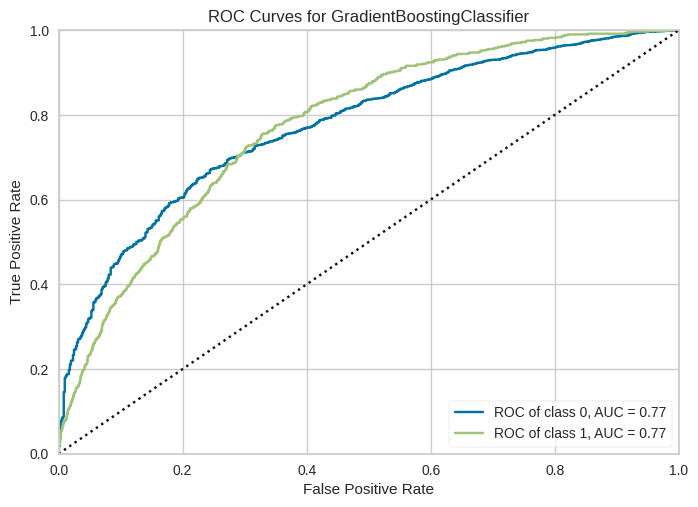

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_woe_enc_tot, y_test)
visualizer2.score(X_test_woe_enc_tot, y_test)
visualizer2.show()

### 7. Técnicas de balanceo
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#### Undersampling

In [ ]:
rus = RandomUnderSampler(
    sampling_strategy='auto',
    random_state=0,
    replacement=True
)
X_train_woe_enc_tot_rus, y_train_rus = rus.fit_resample(X_train_woe_enc_tot, y_train)

In [ ]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_woe_enc_tot_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

{'max_depth': 3, 'min_samples_split': 0.8052231968327465, 'n_estimators': 149}

In [ ]:
results = pd.DataFrame(search_gbc2.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 3, 'min_samples_split': 0.805223...",0.814048,0.003639,0.771913,0.015770
1,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.889059,0.002596,0.771453,0.016110
2,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.861755,0.002538,0.771016,0.017955
3,"{'max_depth': 2, 'min_samples_split': 0.583321...",0.827469,0.002028,0.770857,0.016969
4,"{'max_depth': 3, 'min_samples_split': 0.440773...",0.852676,0.002322,0.770835,0.018572
5,"{'max_depth': 3, 'min_samples_split': 0.441833...",0.850014,0.002262,0.770556,0.018272
6,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.872130,0.003382,0.769975,0.016822
7,"{'max_depth': 4, 'min_samples_split': 0.377440...",0.840321,0.002090,0.769929,0.016805
8,"{'max_depth': 2, 'min_samples_split': 0.815455...",0.805818,0.003660,0.769786,0.014982
9,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.837681,0.003220,0.769703,0.016974


Text(0.5, 0, 'Hyperparameter space')

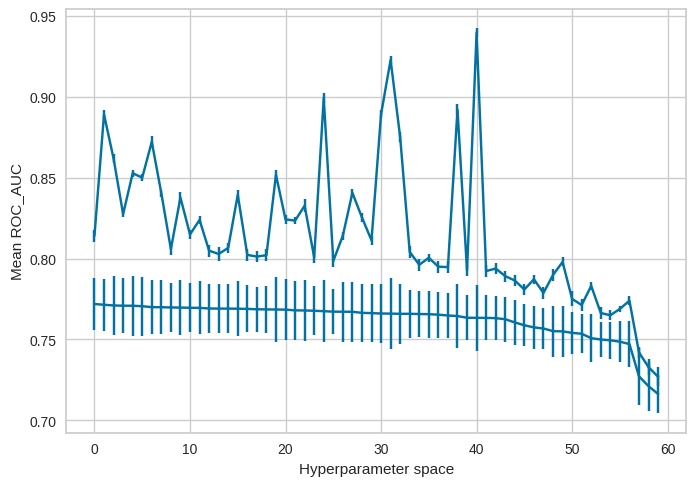

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
# Modelo GBC con Balanceo
pred_train_gbc2 = search_gbc2.predict_proba(X_train_woe_enc_tot)
pred_test_gbc2 = search_gbc2.predict_proba(X_test_woe_enc_tot)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc2[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc2[:,1])-1)
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

Train roc_auc:  0.7860810390645632 GINI Train  0.5721620781291263
Test roc_auc:  0.7658562363014836 GINI Test  0.5317124726029672


In [ ]:
# Modelo GBC Previo
pred_train_gbc = search_gbc.predict_proba(X_train_woe_enc_tot)
pred_test_gbc = search_gbc.predict_proba(X_test_woe_enc_tot)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Train roc_auc:  0.8134343272904164 GINI Train  0.6268686545808329
Test roc_auc:  0.7740115275372411 GINI Test  0.5480230550744822


### 8. Calibración del Modelo:
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

(7, 7)

In [ ]:
mean_predicted_value

array([0.03759255, 0.13836964, 0.2402592 , 0.33244941, 0.43324729,
       0.54868518, 0.6152452 ])

In [ ]:
fraction_of_positives

array([0.03828741, 0.13880814, 0.20879121, 0.36144578, 0.4       ,
       0.57142857, 0.66666667])

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

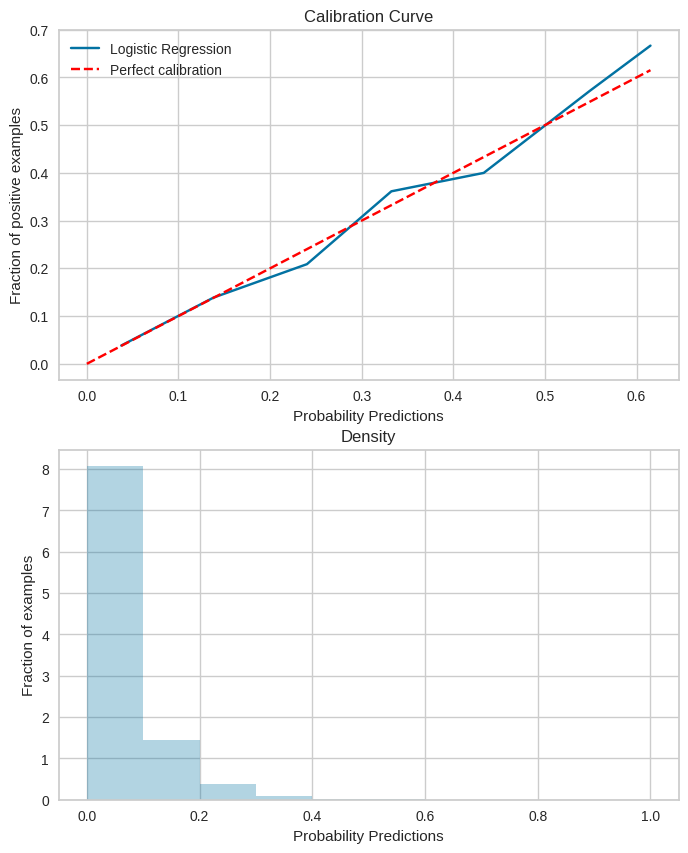

In [ ]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
brier_score_loss(y_test, pred_test_gbc[:, 1])

0.05511165773878855

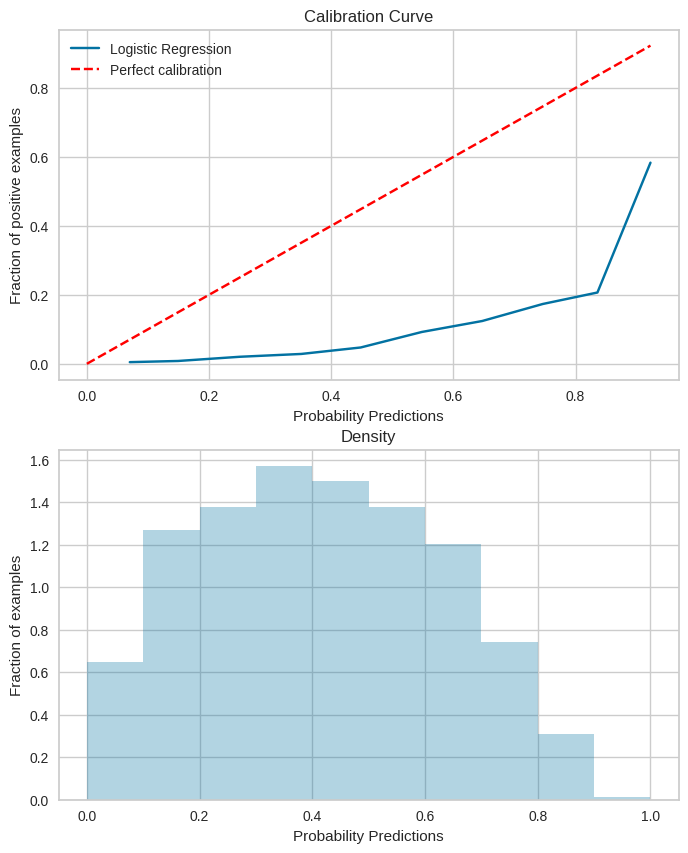

In [ ]:
# Modelo con Undersampling
plot_calibration_curve(y_test, pred_test_gbc2[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_gbc2[:, 1])

0.2045571402553281

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

### Planteemos dos métodos, el ajuste por función sigmoide y el ajuste por función isotónica

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(search_gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_woe_enc_tot, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_woe_enc_tot)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(search_gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_woe_enc_tot, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_woe_enc_tot)[:, 1]

#### Revisemos la calibración Sigmoide

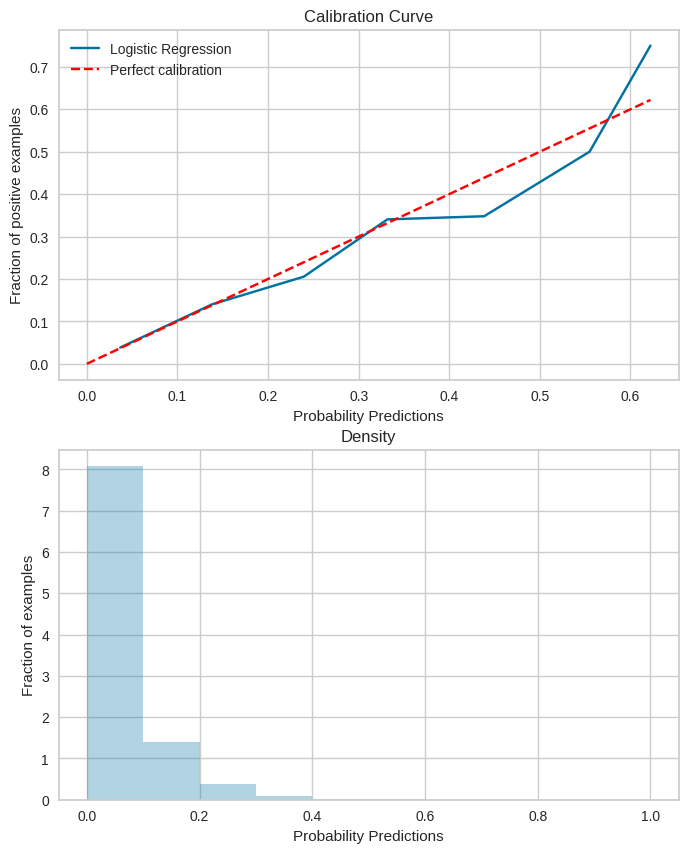

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

### Acaso la calibración varía la discriminación del modelo?

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid)))

Test set
GBC roc-auc: 0.7740115275372411
Test set con Calibrado
GBC roc-auc: 0.7740115275372411


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid)))

Test set
Brier Score: 0.05511165773878855
Test set con Calibrado
Brier Score: 0.05512270001375414


### Ahora revisemos la calibración isotónica

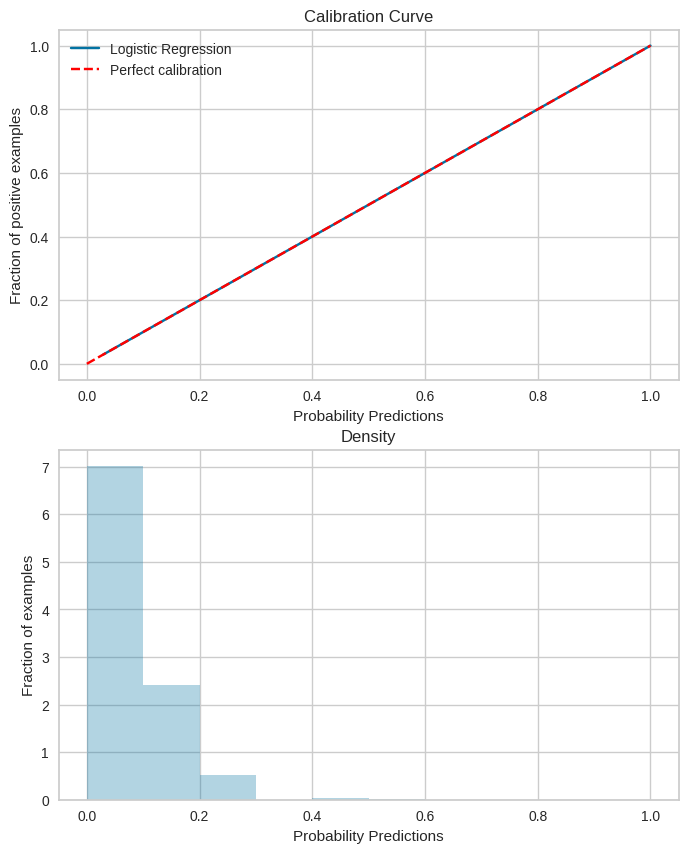

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

Test set
GBC roc-auc: 0.7740115275372411
Test set con Calibrado
GBC roc-auc: 0.7787022629127813


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

Test set
Brier Score: 0.05511165773878855
Test set con Calibrado
Brier Score: 0.054640861916790746


In [ ]:
# Sobre el modelo balanceado por undersampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(search_gbc2, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_woe_enc_tot, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_woe_enc_tot)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(search_gbc2, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_woe_enc_tot, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_woe_enc_tot)[:, 1]

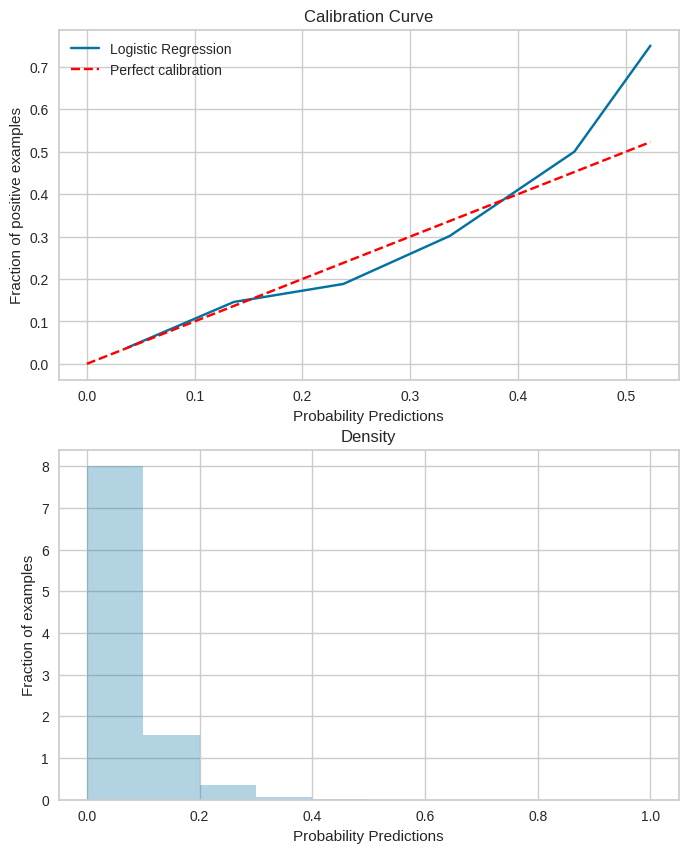

In [ ]:
# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc2[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

Test set
GBC roc-auc: 0.7658562363014836
Test set con Calibrado
GBC roc-auc: 0.7658562363014836


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

Test set
Brier Score: 0.2045571402553281
Test set con Calibrado
Brier Score: 0.0557599856863189


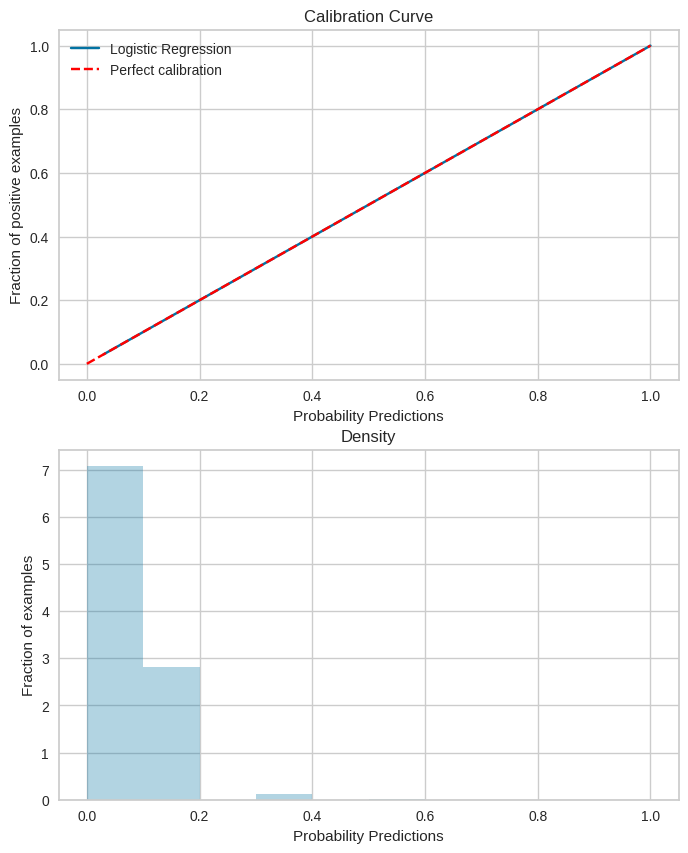

In [ ]:
# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc2[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

Test set
GBC roc-auc: 0.7658562363014836
Test set con Calibrado
GBC roc-auc: 0.7704241977346832


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

Test set
Brier Score: 0.2045571402553281
Test set con Calibrado
Brier Score: 0.05525751743434467


## **9. Unboxing de Modelos**

---



#### Primero, entendamos la importancia de cada variable. Hagamos el ejercicio con cada tipo de algoritmo

#### **Logit**

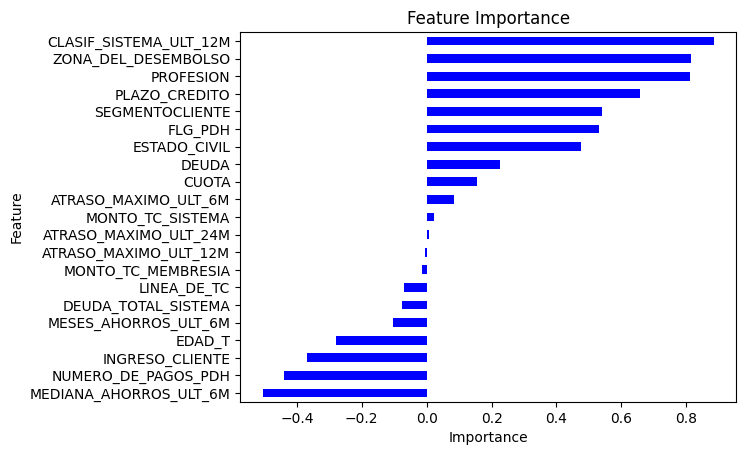

In [ ]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Random Forest**

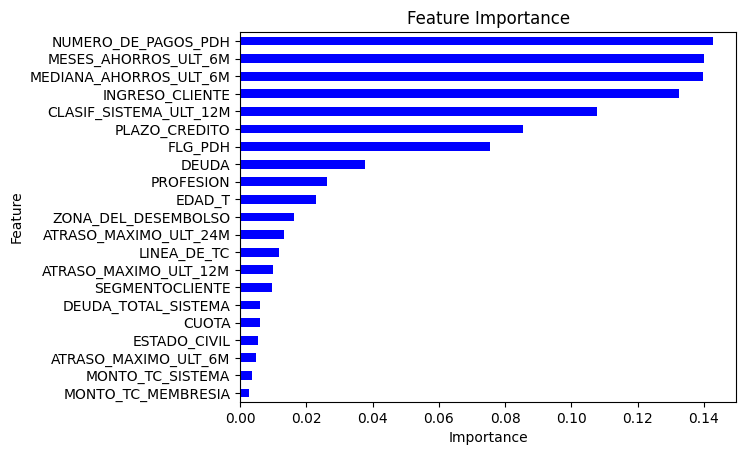

In [ ]:
fi=pd.Series(rf.feature_importances_,index=rf.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Gradient Boosting**

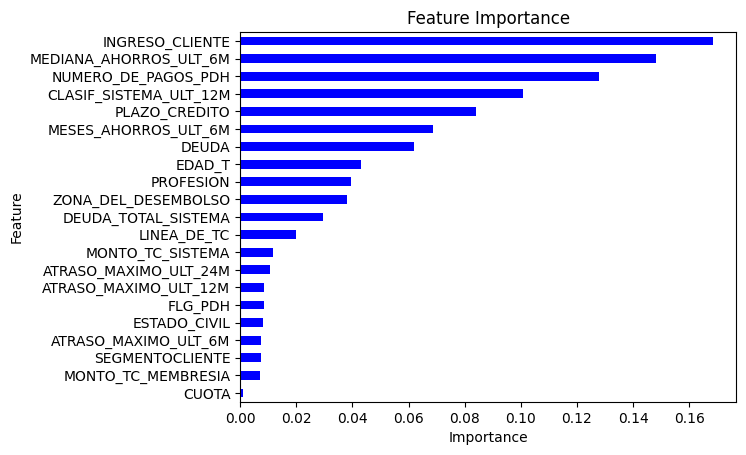

In [ ]:
fi=pd.Series(gbc.feature_importances_,index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [616]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.4 MB/s eta 0:00:00


In [617]:
import shap

In [618]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_woe_enc_tot)
print(shap_values_bin.shape)

(9584, 14)


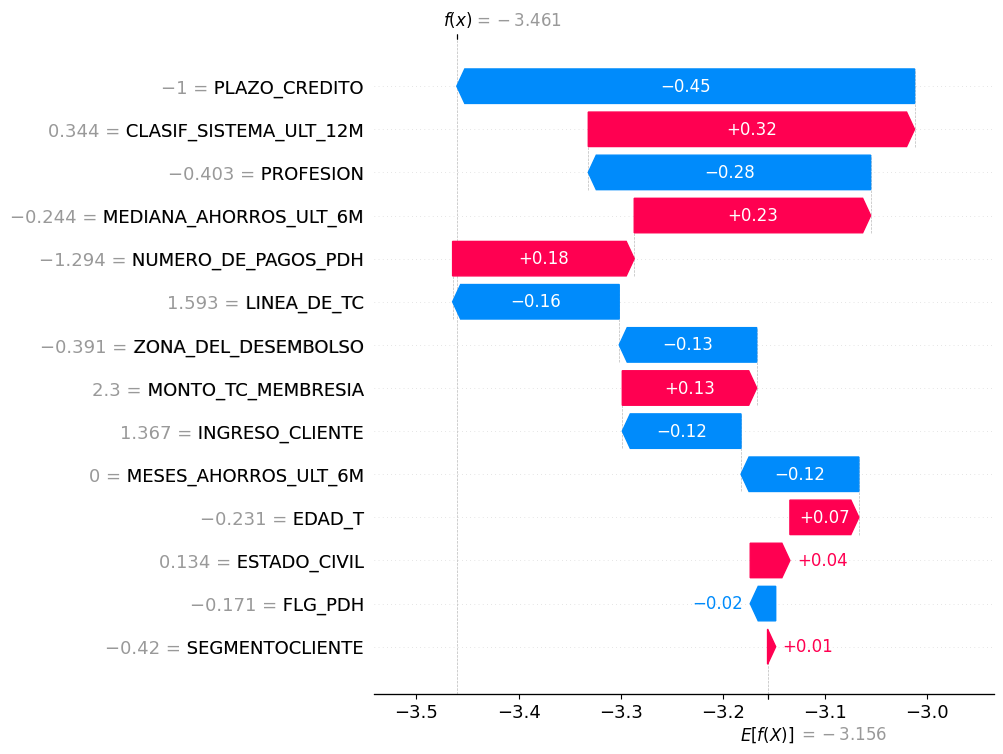

In [619]:
shap.plots.waterfall(shap_values_bin[0],max_display=30)

### En este punto hagamos la prueba de como se incrementa o reduce el riesgo según el aprote de cada variable

In [620]:
pred_test_gbc[0,1]

0.03045607840879759

In [621]:
import math

In [623]:
# el valor del log odds en la primera observación es
x=-3.461
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

0.030442503643634513

#### Podemos graficar la relación entre los shap values (log odds) y los valores de una variable

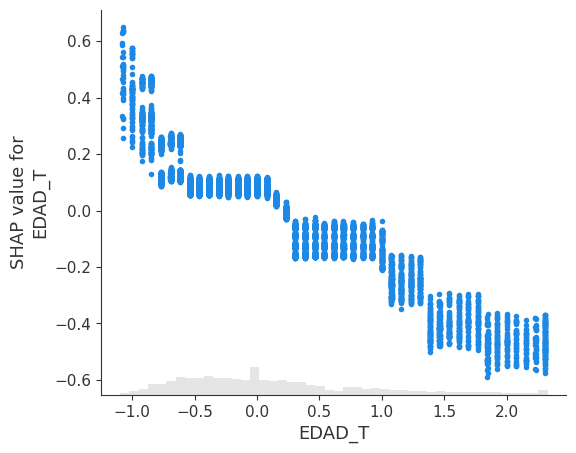

In [624]:
shap.plots.scatter(shap_values_bin[:, "EDAD_T"])

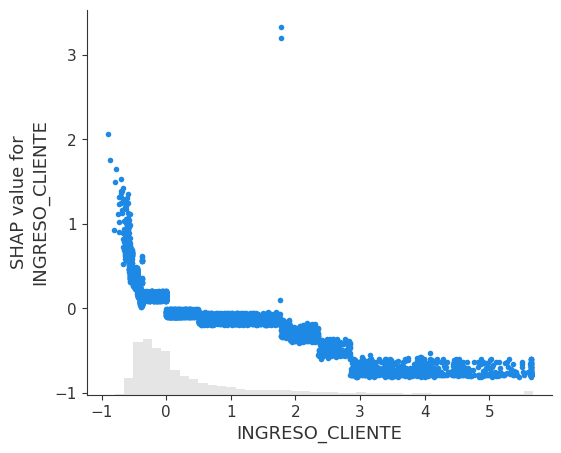

In [626]:
shap.plots.scatter(shap_values_bin[:, "INGRESO_CLIENTE"])

In [627]:
# En este punto revisamos el valor en probabilidad y como se explica cada punto
shap.initjs()
shap.plots.force(shap_values_bin[0],link='logit')

### Con el gráfico de barras vamos a evaluar la importancia media de cada variable

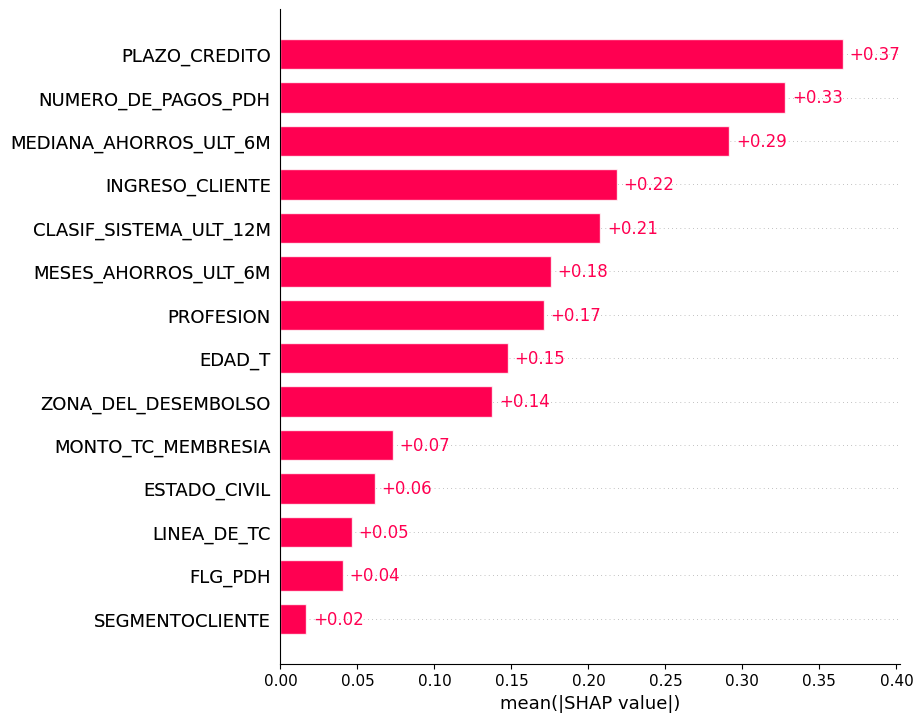

In [628]:
shap.plots.bar(shap_values_bin,max_display=30)

#### Podemos también construir un gráfico local, es decir, para una observación

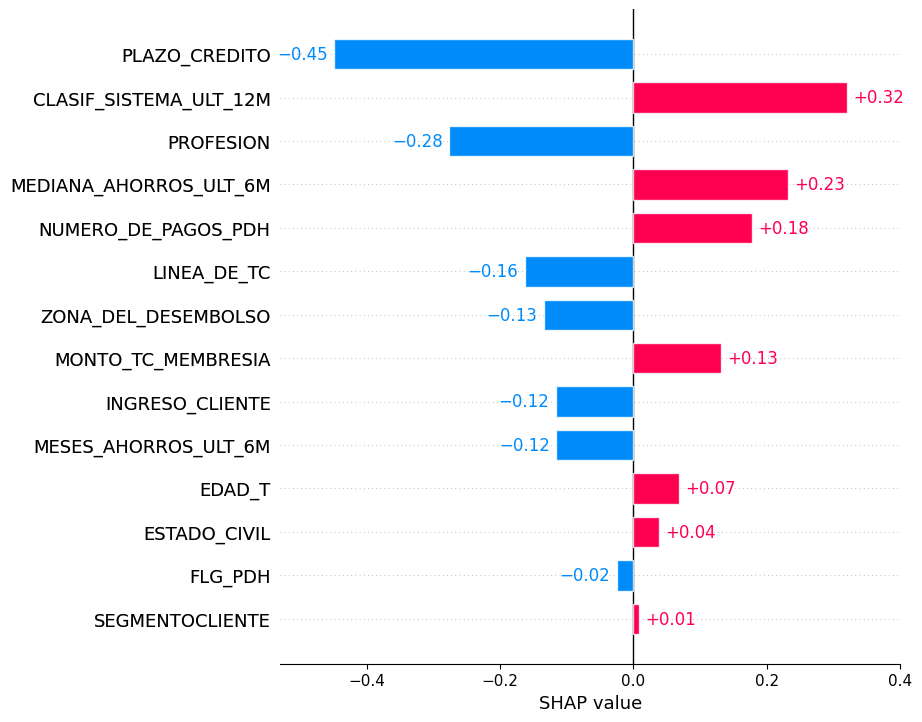

In [629]:
shap.plots.bar(shap_values_bin[0],max_display=30)

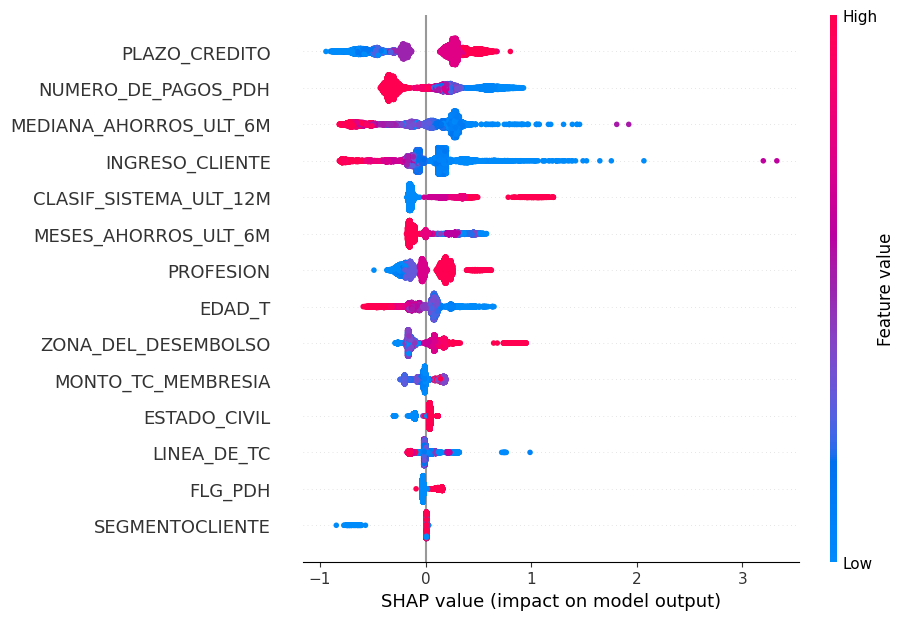

In [631]:
# Este tipo de gráfico evalua todo el conjunto
shap.plots.beeswarm(shap_values_bin, max_display=30)

## **10. Pickling y Unpickling el Modelo y del Pipeline del Feature Engineering**

In [632]:
import pickle

In [636]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pickle','wb') as fe_data_file:
     pickle.dump(pipe_5,fe_data_file)

In [633]:
# Empaquetamos el modelo obtenido
with open('final_model.pickle','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [637]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [634]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

In [638]:
#Probemos el pipeline
X_train_t_p=fe_final.transform(X_train)
X_test_t_p=fe_final.transform(X_test)

In [641]:
X_train_woe_enc_tot_p=pd.concat([X_train_t_p[cat_cols_2],X_train_t_p[num_cols_2]],axis=1)
X_test_woe_enc_tot_p=pd.concat([X_test_t_p[cat_cols_2],X_test_t_p[num_cols_2]],axis=1)

In [642]:
# Probemos el modelo
pred_train_prueba = modelo_final.predict_proba(X_train_woe_enc_tot_p)
pred_test_prueba = modelo_final.predict_proba(X_test_woe_enc_tot_p)
print('GBC Train Prueba roc-auc: {}'.format(roc_auc_score(y_train, pred_train_prueba[:,1])))
print('GBC Test Prueba roc-auc: {}'.format(roc_auc_score(y_test, pred_test_prueba[:,1])))

GBC Train Prueba roc-auc: 0.7997703785227982
GBC Test Prueba roc-auc: 0.7682408769693151


In [646]:
pd.concat([X_test,y_test],axis=1).to_csv('Base_SolicitudesCreditoEfectivo_Test.csv', index = False)